In [ ]:
!pip install prophet

import prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings
import prophet

In [ ]:
data = pd.read_csv("GOOGLE.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-09,1197.989990,1203.880005,1183.603027,1188.010010,1188.010010,1065700
1,2019-08-12,1179.209961,1184.959961,1167.671997,1174.709961,1174.709961,1003000
2,2019-08-13,1171.459961,1204.780029,1171.459961,1197.270020,1197.270020,1294400
3,2019-08-14,1176.310059,1182.300049,1160.540039,1164.290039,1164.290039,1578700
4,2019-08-15,1163.500000,1175.839966,1162.109985,1167.260010,1167.260010,1218700
...,...,...,...,...,...,...,...
247,2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,1474.449951,2330200
248,2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,1464.969971,1903500
249,2020-08-05,1469.300049,1482.410034,1463.459961,1473.609985,1473.609985,1979500
250,2020-08-06,1471.750000,1502.390015,1466.000000,1500.099976,1500.099976,1995400


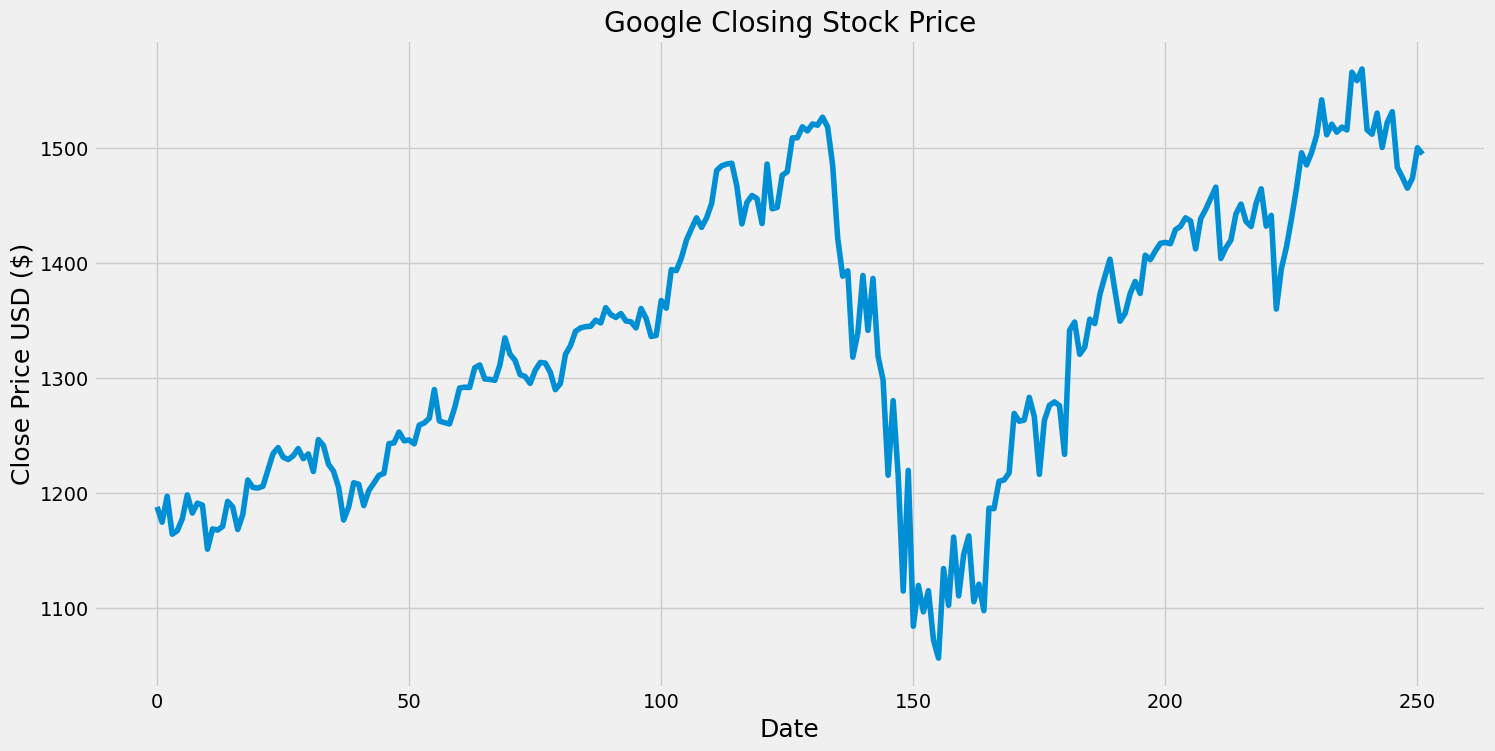

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [ ]:
data = data[["Date","Close"]]
data = data.rename(columns = {"Date":'ds','Close':'y'})
data.head()

,ds,y
0,2019-08-09,1188.010010
1,2019-08-12,1174.709961
2,2019-08-13,1197.270020
3,2019-08-14,1164.290039
4,2019-08-15,1167.260010


In [ ]:
from prophet import Prophet
#use for time series analysis

In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa0uh30i1/6y2km66r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa0uh30i1/leh3km8w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87543', 'data', 'file=/tmp/tmpa0uh30i1/6y2km66r.json', 'init=/tmp/tmpa0uh30i1/leh3km8w.json', 'output', 'file=/tmp/tmpa0uh30i1/prophet_model8ip1kjmg/prophet_model-20230519041136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:11:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:11:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


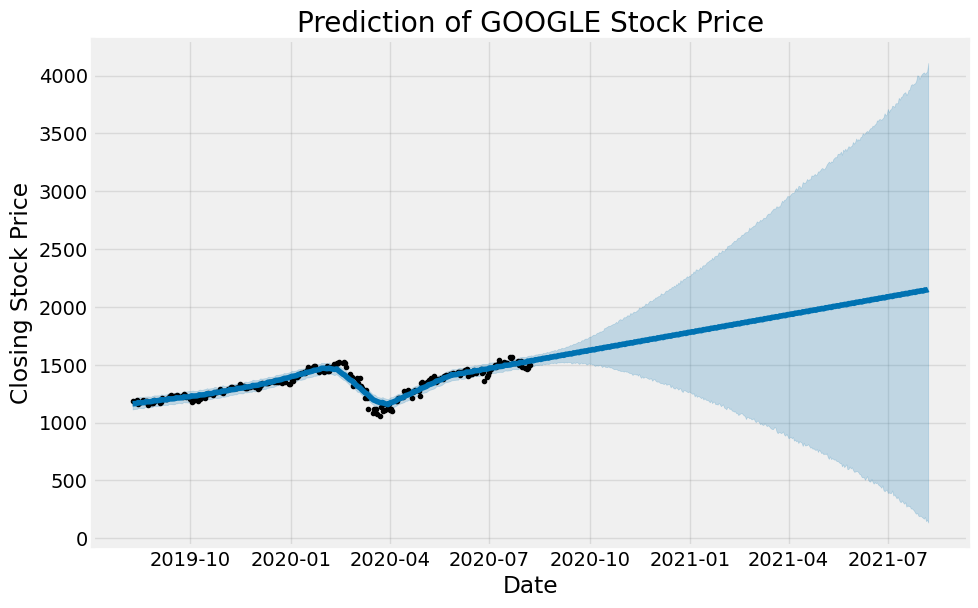

In [ ]:
#visualization of the stocks
future = model.make_future_dataframe(periods=365)
predictions=model.predict(future)
model.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

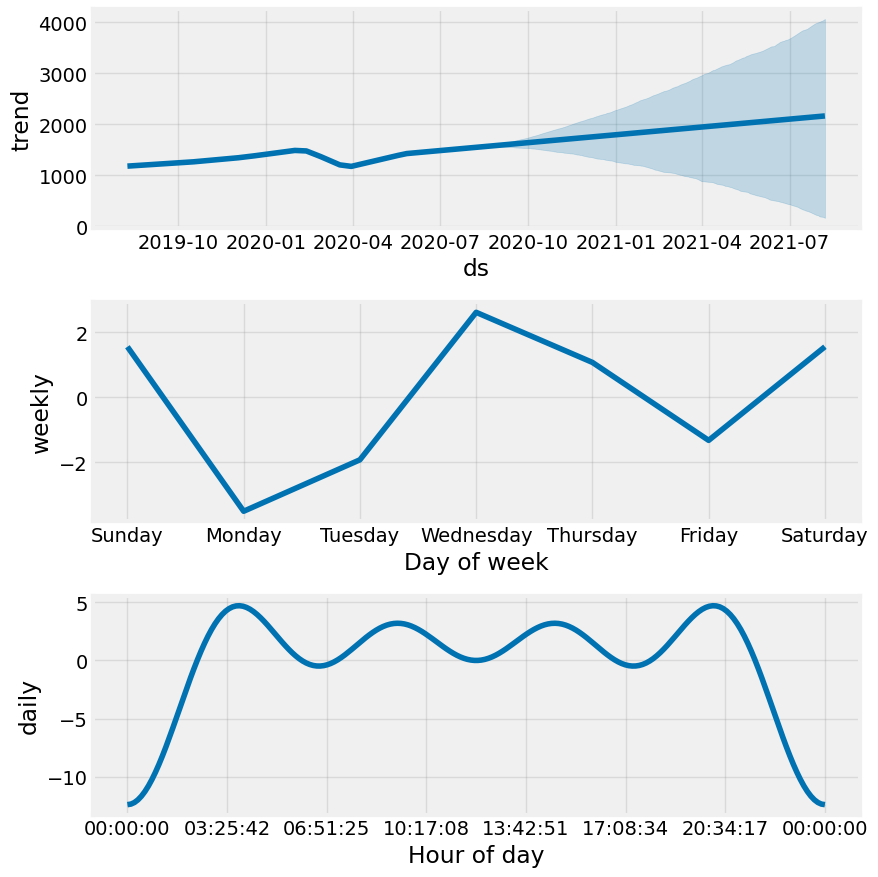

In [ ]:
model.plot_components(predictions)
plt.show()